In [11]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [12]:
df_train = pd.read_csv("features_train.csv")
y = pd.read_csv("y_train.csv")
df_test = pd.read_csv("features_test.csv")

In [13]:
df_train['sleep_stage'] = y['sleep_stage']
df_train = df_train.drop(['Subject'],axis = 1)

In [14]:
df_train.head()


,index,eeg_1_Delta_DMM,eeg_1_Theta_DMM,eeg_1_Alpha_DMM,eeg_1_Beta_DMM,eeg_1_Gamma_DMM,eeg_1_Delta_Esis,eeg_1_Theta_Esis,eeg_1_Alpha_Esis,eeg_1_Beta_Esis,...,z_Variance,z_Kurtosis,z_Skewness,z_Abs_energy,z_First_quantile,z_Median,z_Third_quantile,z_IQR,z_Mode,sleep_stage
0,0.0,1158.706171,510.518916,287.558598,519.342024,788.450376,2.967970e+08,3.831383e+07,2.535931e+07,2.252237e+07,...,4.764771e-07,3.002438,-0.563973,0.000144,-0.000248,-0.000020,0.000223,-0.000471,-0.002464,4
1,1.0,6801.025232,1383.689775,601.356698,463.815355,461.614623,5.191074e+10,1.555679e+09,2.649430e+08,1.342694e+08,...,8.503503e-06,1.091460,-0.706212,0.002553,-0.001404,0.000176,0.001851,-0.003255,-0.009225,2
2,2.0,1943.699285,461.971353,260.563843,310.722071,417.792461,1.007768e+09,8.766151e+07,2.740391e+07,2.537572e+07,...,1.299241e-05,-1.353092,0.076593,0.003899,-0.003410,-0.000084,0.003362,-0.006772,-0.005678,3
3,3.0,1165.221198,412.977956,299.003675,652.685782,676.331191,2.820157e+08,5.774946e+07,3.285648e+07,3.492277e+07,...,3.714148e-06,-1.390850,0.024706,0.001115,-0.001823,-0.000002,0.001885,-0.003708,-0.003166,2
4,4.0,1908.554998,533.369717,406.183862,412.121225,550.647584,9.447749e+08,1.121841e+08,4.072544e+07,2.379589e+07,...,1.020778e-05,-1.431659,-0.001413,0.003063,-0.002997,0.000002,0.003116,-0.006113,-0.005095,2


In [15]:
X = df_train[df_train.keys()[1:331]]
y = df_train['sleep_stage']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## SVM

In [20]:
from sklearn import svm
model1 = svm.SVC(kernel='rbf', gamma ='auto')
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print("Accuracy of SVM :", accuracy_score(y_test, y_pred))

Accuracy of SVM : 0.37


In [11]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()
modelnb.fit(X_train,y_train)
y_pred = modelnb.predict(X_test)
print("Accuracy of Naive Bayes :", accuracy_score(y_test, y_pred))

Accuracy of Naive Bayes : 0.2653333333333333


In [ ]:
#CROSS VALIDATION
cv_results = cross_validate(model1,X,y,cv=7)
cv_results

## Random Forest 

In [7]:
model2 = RandomForestClassifier(max_depth=7, random_state=0, n_estimators=30)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print("Accuracy of RF :", accuracy_score(y_test, y_pred))

Accuracy of SVM : 0.681


In [8]:
#CROSS VALIDATION
cv_results = cross_validate(model2,X,y,cv=7)
cv_results

{'fit_time': array([2.76333022, 3.9990449 , 3.36074877, 3.25269032, 3.94991541,
        2.69701123, 3.94991326]),
 'score_time': array([0.01554132, 0.0155921 , 0.02621818, 0.01609707, 0.        ,
        0.01555109, 0.01610303]),
 'test_score': array([0.48110126, 0.60475968, 0.67242184, 0.60149323, 0.55996267,
        0.7125525 , 0.60550887])}

## Extra Trees

In [18]:
model3 = ExtraTreesClassifier(n_estimators=240, random_state = 410)
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
print("Accuracy of Extra Trees :", accuracy_score(y_test, y_pred))

Accuracy of Extra Trees : 0.746


In [ ]:
cv_results = cross_validate(model3,X,y, cv=7)
cv_results

In [16]:
acc_list = []
n_list = []
for n in range(10,500,10):
    model3 = ExtraTreesClassifier(n_estimators=240, random_state = n)
    model3.fit(X_train,y_train)
    y_pred = model3.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))
    n_list.append(n)

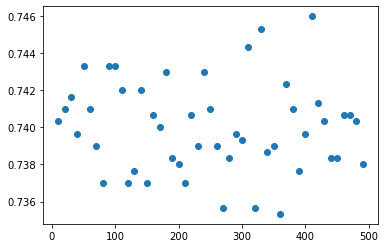

In [17]:
plt.scatter(n_list, acc_list)
plt.show()

In [21]:
outputs_3t = model3.predict(df_test[df_test.keys()[2:]])

In [22]:
Y_dataframe = pd.DataFrame(np.arange(len(outputs_3t))+15000, columns =["index"])
Y_dataframe["sleep_stage"] = outputs_3t
Y_dataframe.to_csv("predictionfinal_74.csv", index=False)
Y_dataframe

,index,sleep_stage
0,15000,3
1,15001,0
2,15002,0
3,15003,3
4,15004,2
...,...,...
5995,20995,3
5996,20996,3
5997,20997,2
5998,20998,0


## Light GBM

In [23]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [24]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [25]:
# predict the results
y_pred=clf.predict(X_test)

In [26]:
print("Accuracy of LGBM :", accuracy_score(y_test, y_pred))

Accuracy of LGBM : 0.74


In [27]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9928
Test set score: 0.7400


In [28]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[244   5  54  20  25]
 [ 13  14  74   7  22]
 [ 44   1 835 129 101]
 [ 10   0 112 667   2]
 [ 15   0 130  16 460]]

True Positives(TP) =  244

True Negatives(TN) =  14

False Positives(FP) =  5

False Negatives(FN) =  13


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       348
           1       0.70      0.11      0.19       130
           2       0.69      0.75      0.72      1110
           3       0.79      0.84      0.82       791
           4       0.75      0.74      0.75       621

    accuracy                           0.74      3000
   macro avg       0.74      0.63      0.64      3000
weighted avg       0.74      0.74      0.73      3000



In [7]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(X_train, y_train)
# # make a single prediction
# row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
y_pred = model.predict(X_test)
# print('Prediction: %d' % yhat[0])
print("Accuracy of LGBM :", accuracy_score(y_test, y_pred))

Accuracy: 0.742 (0.011)
Accuracy of LGBM : 0.74


## XGBoost

In [8]:
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=X,label=y)
modelx = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss')
modelx.fit(X_train,y_train)
y_pred = modelx.predict(X_test)
print("Accuracy of XGBoost :", accuracy_score(y_test, y_pred))

Accuracy of XGBoost : 0.742


In [7]:
from sklearn.ensemble import VotingClassifier

In [13]:
clf1 = ExtraTreesClassifier(n_estimators=240)
clf2 = lgb.LGBMClassifier()
clf3 = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss')

In [14]:
eclf1 = VotingClassifier(estimators=[('et', clf1), ('lgbm', clf2), ('xgb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)
print("Accuracy of Voting :", accuracy_score(y_test, y_pred))

Accuracy of Voting : 0.7513333333333333


In [15]:
outputs_3t = eclf1.predict(df_test[df_test.keys()[2:]])
Y_dataframe = pd.DataFrame(np.arange(len(outputs_3t))+15000, columns =["index"])
Y_dataframe["sleep_stage"] = outputs_3t
Y_dataframe.to_csv("predictionfinal.csv", index=False)

,index,sleep_stage
0,15000,2
1,15001,0
2,15002,0
3,15003,3
4,15004,2
...,...,...
5995,20995,3
5996,20996,3
5997,20997,2
5998,20998,0


In [16]:
eclf2 = VotingClassifier(estimators=[('et', clf1), ('lgbm', clf2), ('xgb', clf3)], voting='soft')
eclf2 = eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)
print("Accuracy of Voting Soft:", accuracy_score(y_test, y_pred))

Accuracy of Voting Soft: 0.7516666666666667


In [17]:
eclf2 = VotingClassifier(estimators=[('et', clf1), ('lgbm', clf2), ('xgb', clf3)], voting='soft', weights=[2,1,1.5], flatten_transform=True)
eclf2 = eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)
print("Accuracy of Voting Soft Weights:", accuracy_score(y_test, y_pred))

Accuracy of Voting Soft Weights: 0.7506666666666667


## Optimising the classifiers

### Extra Trees

In [ ]:
model = ExtraTreesClassifier(n_estimators=240, n_jobs=4, min_samples_split=25,
                            min_samples_leaf=35, max_features=250)
param_grid = {
        #'n_estimators': [150,200,250,300,350],
        #'max_features': [150,200,250,300,350],
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
}

In [27]:
model = ExtraTreesClassifier(n_estimators=240)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy of  ET:", accuracy_score(y_test, y_pred))

Accuracy of  ET: 0.744


In [22]:
acc_list = []
n_list = []
for n in range(5,61,5):
    print(n)
    model3 = ExtraTreesClassifier(n_estimators=240,min_samples_leaf=n)
    model3.fit(X_train,y_train)
    y_pred = model3.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))
    n_list.append(n)

5
10
15
20
25
30
35
40
45
50
55
60


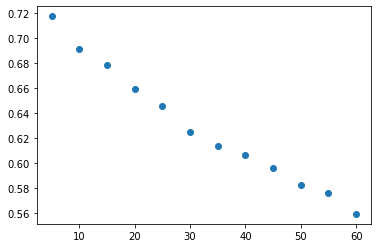

In [23]:
plt.scatter(n_list, acc_list)
plt.show()

### XGBoost

In [ ]:
param_grid = {
    'n_estimators': [100, 250, 400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    #'reg_alpha': [1.1, 1.2, 1.3],
    #'reg_lambda': [1.1, 1.2, 1.3],
    #'subsample': [0.7, 0.8, 0.9]
}


In [35]:
modelx = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss',n_estimators=400)
                           #colsample_bytree = 0.3)
modelx.fit(X_train,y_train)
y_pred = modelx.predict(X_test)
print("Accuracy of XGBoost :", accuracy_score(y_test, y_pred))

Accuracy of XGBoost : 0.752


In [ ]:
n_est = 400 0.752, colsamp 0.3- 0.75, 

In [36]:
acc_list = []
n_list = []
for n in range(10,91,10):
    model3 = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss',n_estimators=400,max_depth = n)
    model3.fit(X_train,y_train)
    y_pred = model3.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)
    n_list.append(n)
    print(n,acc)

10 0.7436666666666667
20 0.7416666666666667
30 0.7426666666666667
40 0.741
50 0.7453333333333333
60 0.7453333333333333
70 0.7453333333333333


KeyboardInterrupt: 

In [ ]:
plt.scatter(n_list, acc_list)
plt.show()

## GridSearchCV 

In [ ]:
#Show the evolution of the cross-validated error rate as function of C and gamma.
# importing test data
filename = 'Banana_test.txt'
data_test = np.loadtxt(filename, delimiter=' ', skiprows=1, dtype= float, usecols=range(1,4))
df_test = pd.DataFrame(data_test, columns=['X1', 'X2', 'Y'])
X_test=df_test[['X1', 'X2']]
y_test=df_test['Y'].values

# Set the parameters by cross-validation
tuned_parameters = [
    {"gamma": [50,10,1,0.1,0.01,1e-3, 1e-4], "C": [0.1,1, 10, 100, 1000]}
]

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        Score_list.append(mean)
        C_list.append(params['C'])
        G_list.append(params['gamma'])
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

In [9]:
from sklearn.model_selection import GridSearchCV
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
model = ExtraTreesClassifier(n_estimators=240, n_jobs=4, min_samples_split=25,
                            min_samples_leaf=35, max_features=250)
param_grid = {
        #'n_estimators': [150,200,250,300,350],
        #'max_features': [150,200,250,300,350],
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='accuracy')

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
#Extra Tree Optimiser
from sklearn.model_selection import GridSearchCV
model = ExtraTreesClassifier(n_estimators=100, n_jobs=4, min_samples_split=25,
                            min_samples_leaf=35, max_features=150)
                            
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': [150,200,250,300,350],
        'max_features': [150,200,250,300,350],
        #'min_samples_leaf': range(20,50,5),
        #'min_samples_split': range(15,36,5),
    },
    scoring='r2',
    cv=5
)

grid_result = gsc.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

for test_mean, train_mean, param in zip(
        grid_result.cv_results_['mean_test_score'],
        grid_result.cv_results_['mean_train_score'],
        grid_result.cv_results_['params']):
    print("Train: %f // Test : %f with: %r" % (train_mean, test_mean, param))
    

In [ ]:
modelet = ExtraTreesClassifier(**grid_result.best_params_)
modelet.fit(X_train, y_train)
y_pred = modelet.predict(X_test)
print("Accuracy of Voting Soft Weights:", accuracy_score(y_test, y_pred))

In [ ]:
model = lgb.LGBMClassifier()
param_grid = {
    'n_estimators': [250, 400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    #'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    #'reg_alpha': [1.1, 1.2, 1.3],
    #'reg_lambda': [1.1, 1.2, 1.3],
    #'min_split_gain': [0.3, 0.4],
    #'subsample': [0.7, 0.8, 0.9],
    #'subsample_freq': [20]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='accuracy')

print(model.best_score_)
print(model.best_params_)

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
param_grid = {
    'n_estimators': [100, 250, 400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    #'reg_alpha': [1.1, 1.2, 1.3],
    #'reg_lambda': [1.1, 1.2, 1.3],
    #'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)